In [19]:
import pandas as pd
from pyproj import Proj, transform
import geopandas as gpd
from shapely import wkt
from pyproj import Transformer
import numpy as np
from pyDOE import lhs
from scipy.spatial import distance

In [20]:
sp = pd.read_csv('spComp.csv')
sp = sp[sp['city'] == 'SAO PAULO']
sp.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,number,street,city,district,postcode,latGold,lonGold
203,203,203,203,101,RUA ENRIQUE AMORIM,SAO PAULO,PARELHEIROS,NaN,-23.867041,-46.753330
204,204,204,204,2,BENEDITO SCHUNCK,SAO PAULO,MARSILAC,NaN,-23.880401,-46.741814
205,205,205,205,S/N,EST ENGENHEIRO MARCILAC,SAO PAULO,MARSILAC,NaN,-23.875968,-46.738807
206,206,206,206,7,PASCOAL BELMONT,SAO PAULO,MARSILAC,NaN,-23.908371,-46.707091
207,207,207,207,75,RUA FILOMENA BELMONT,SAO PAULO,MARSILAC,NaN,-23.907963,-46.706575


In [21]:
print(len(sp))

7219


In [22]:
# Definir o número de amostras desejado
n_samples = 5000

# Extrair as colunas de latitude e longitude do dataframe
coordinates = sp[['latGold', 'lonGold']].values

# Gerar as amostras usando o Latin Hypercube Sampling
samples = lhs(n=len(coordinates[0]), samples=n_samples)

# Redimensionar as amostras para o intervalo de latitude e longitude
for i in range(len(coordinates[0])):
    samples[:, i] = coordinates[:, i].min() + \
                    samples[:, i] * (coordinates[:, i].max() - coordinates[:, i].min())

# Criar um dataframe vazio para armazenar as amostras
sampled_df = pd.DataFrame(columns=sp.columns)

# Encontrar o ponto mais próximo para cada amostra
for sample in samples:
    sample_point = sample.reshape(1, -1)
    distances = distance.cdist(sample_point, coordinates)
    closest_idx = np.argmin(distances)
    closest_point = sp.iloc[closest_idx]
    sampled_df = sampled_df.append(closest_point)

# Redefinir os índices do dataframe resultante
sampled_df.reset_index(drop=True, inplace=True)

# Verificar o dataframe resultante
print(sampled_df.head())

C:\Users\analu\AppData\Local\Temp\ipykernel_15048\2072155732.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(closest_point)
C:\Users\analu\AppData\Local\Temp\ipykernel_15048\2072155732.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(closest_point)
C:\Users\analu\AppData\Local\Temp\ipykernel_15048\2072155732.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(closest_point)
C:\Users\analu\AppData\Local\Temp\ipykernel_15048\2072155732.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(closest_point)
C:\U

  Unnamed: 0.2 Unnamed: 0.1 Unnamed: 0      number                 street  \
0          212          212        212          45     JANE VANINE CAPOZI   
1         7364         7364       7364          10             DOS LIRIOS   
2        10718        10718      10718          81         ANTONIO XAVIER   
3         8118         8118       8118         259  RUA RIBEIRO JUNQUEIRA   
4          474          474        474         738             PEROBEIRAS   

        city       district  postcode    latGold    lonGold  
0  SAO PAULO    PARELHEIROS       NaN -23.868805 -46.678967  
1  SAO PAULO     SAO RAFAEL       NaN -23.638449 -46.447187  
2  SAO PAULO  JARDIM HELENA       NaN -23.475623 -46.427649  
3  SAO PAULO   CACHOEIRINHA       NaN -23.479475 -46.653269  
4  SAO PAULO  CAPAO REDONDO       NaN -23.693233 -46.795505  


C:\Users\analu\AppData\Local\Temp\ipykernel_15048\2072155732.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(closest_point)
C:\Users\analu\AppData\Local\Temp\ipykernel_15048\2072155732.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(closest_point)
C:\Users\analu\AppData\Local\Temp\ipykernel_15048\2072155732.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(closest_point)
C:\Users\analu\AppData\Local\Temp\ipykernel_15048\2072155732.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled_df = sampled_df.append(closest_point)
C:\U

In [23]:
len(sampled_df)

5000

In [29]:
sampled_df.to_csv('amostraSP.csv')

## Gráficos dos dados amostrados e totais

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [26]:
# Load the shapefile (replace 'path_to_shapefile.shp' with the actual path)
shapefile_path = 'https://github.com/rcpsilva/UncertaintyQuantificationForGeocodingServices/raw/main/PaperGeoinfo/results/SMunicipios_2022/SP_Municipios_2022.shp'
gdf = gpd.read_file(shapefile_path)

In [27]:
# Filter the data to select the specific city (e.g., São Paulo)
city_name = "São Paulo"  # Replace with the actual city name you want to plot
city_gdf = gdf[gdf['NM_MUN'] == city_name]
dfs = [sp, sampled_df]

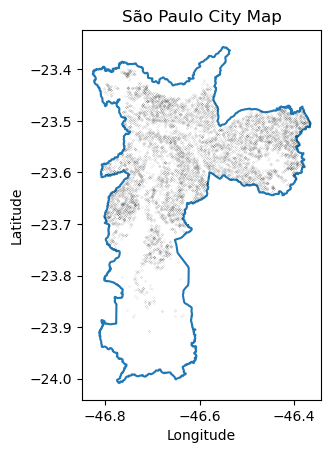

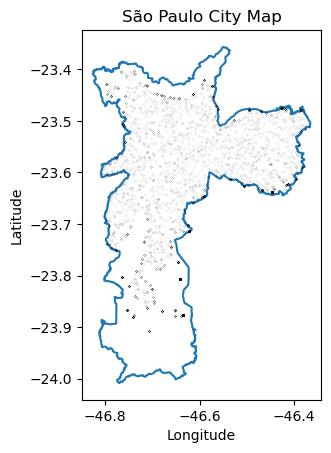

In [28]:
for df in dfs:
    city_gdf.boundary.plot()
    plt.plot(df['lonGold'], df['latGold'],'k.', markersize=0.1)
    plt.title('São Paulo City Map')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()
